In [1]:
DATA_PATH = '.\data\REFIT.h5'


In [2]:
from nilmtk import DataSet

import pandas as pd

# TensorFlow and tf.keras
import tensorflow as tf
# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

In [3]:
refit = DataSet(DATA_PATH)
refit.set_window(start='2014-01-01', end='2014-07-01')

In [4]:
refit.buildings


OrderedDict([(1, Building(instance=1, dataset='REFIT')),
             (10, Building(instance=10, dataset='REFIT')),
             (11, Building(instance=11, dataset='REFIT')),
             (12, Building(instance=12, dataset='REFIT')),
             (13, Building(instance=13, dataset='REFIT')),
             (14, Building(instance=14, dataset='REFIT')),
             (15, Building(instance=15, dataset='REFIT')),
             (16, Building(instance=16, dataset='REFIT')),
             (17, Building(instance=17, dataset='REFIT')),
             (18, Building(instance=18, dataset='REFIT')),
             (19, Building(instance=19, dataset='REFIT')),
             (2, Building(instance=2, dataset='REFIT')),
             (20, Building(instance=20, dataset='REFIT')),
             (3, Building(instance=3, dataset='REFIT')),
             (4, Building(instance=4, dataset='REFIT')),
             (5, Building(instance=5, dataset='REFIT')),
             (6, Building(instance=6, dataset='REFIT')),
         

In [5]:
#refit.buildings[1].elec.proportion_of_energy_submetered()


In [6]:
refit.buildings[1].elec.submeters().energy_per_meter()

9/9 ElecMeter(instance=10, building=1, dataset='REFIT', appliances=[Appliance(type='electric space heater', instance=1)])

,"(2, 1, REFIT)","(3, 1, REFIT)","(4, 1, REFIT)","(5, 1, REFIT)","(6, 1, REFIT)","(7, 1, REFIT)","(8, 1, REFIT)","(9, 1, REFIT)","(10, 1, REFIT)"
active,55.28885,57.349489,93.121483,6.622142,29.797424,27.93757,6.346595,18.960171,273.240798
apparent,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
reactive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
import matplotlib.pyplot as plt

9/9 ElecMeter(instance=10, building=1, dataset='REFIT', appliances=[Appliance(type='electric space heater', instance=1)])

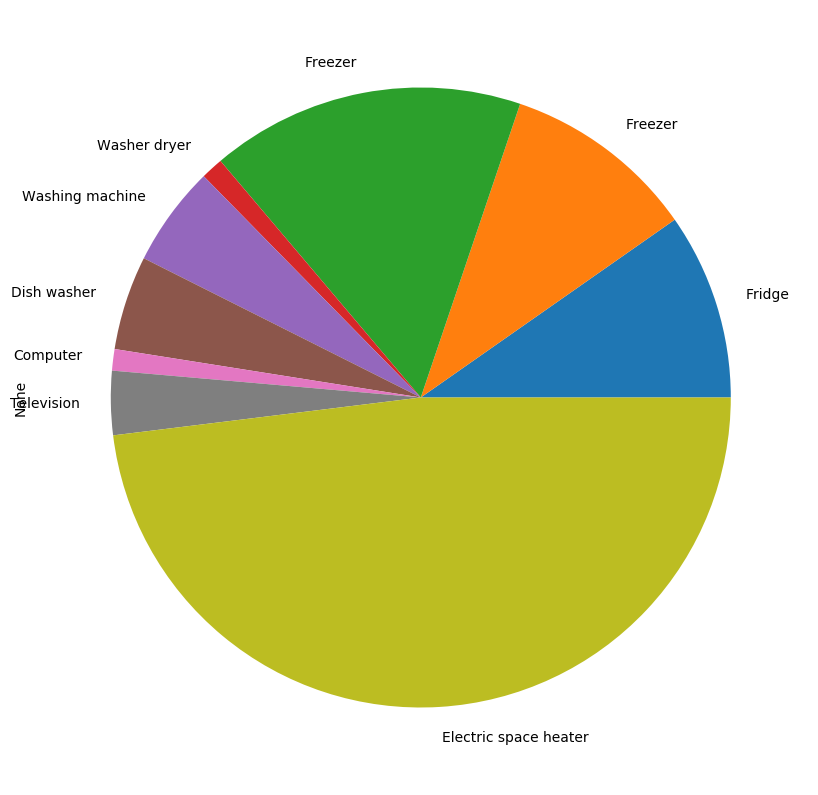

In [8]:
fraction = refit.buildings[1].elec.submeters().fraction_per_meter().dropna()
# Create convenient labels
labels = refit.buildings[1].elec.get_labels(fraction.index)
plt.figure(figsize=(10,30))
fraction.plot(kind='pie', labels=labels)

In [9]:
refit.set_window(start='2014-04-01', end='2014-07-01')
frige = next(refit.buildings[1].elec['fridge'].load(sample_period=120))

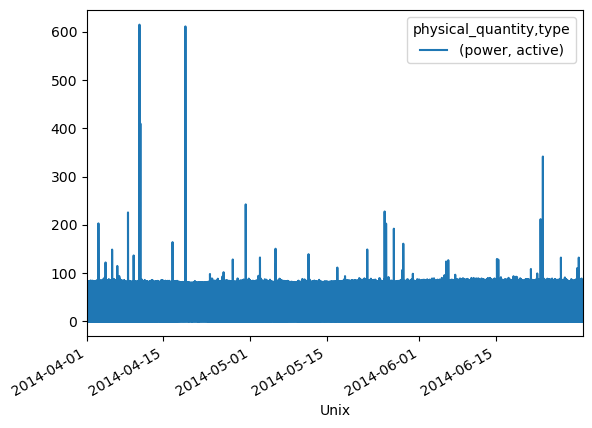

In [10]:
frige.plot()

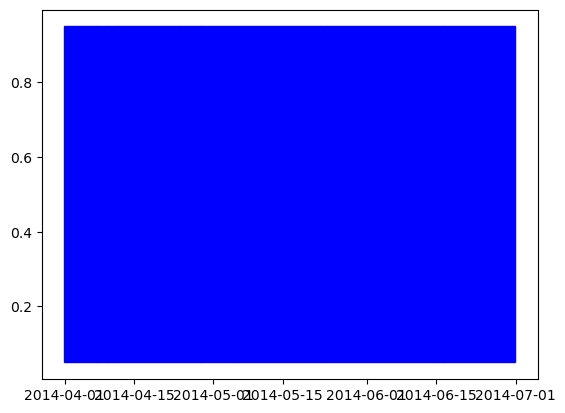

In [11]:
refit.buildings[1].elec['fridge'].good_sections(full_results=True).plot()

In [12]:
type(frige)

pandas.core.frame.DataFrame

In [13]:
frige.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 65520 entries, 2014-04-01 00:00:00+01:00 to 2014-06-30 23:58:00+01:00
Freq: 120S
Data columns (total 1 columns):
(power, active)    65370 non-null float64
dtypes: float64(1)
memory usage: 1023.8 KB


In [14]:
frige.fillna(0, inplace=True)

In [15]:
frige

physical_quantity,power
type,active
Unix,
2014-04-01 00:00:00+01:00,68.20
2014-04-01 00:02:00+01:00,67.95
2014-04-01 00:04:00+01:00,16.65
2014-04-01 00:06:00+01:00,0.00
2014-04-01 00:08:00+01:00,0.00
...,...
2014-06-30 23:50:00+01:00,0.00
2014-06-30 23:52:00+01:00,0.00


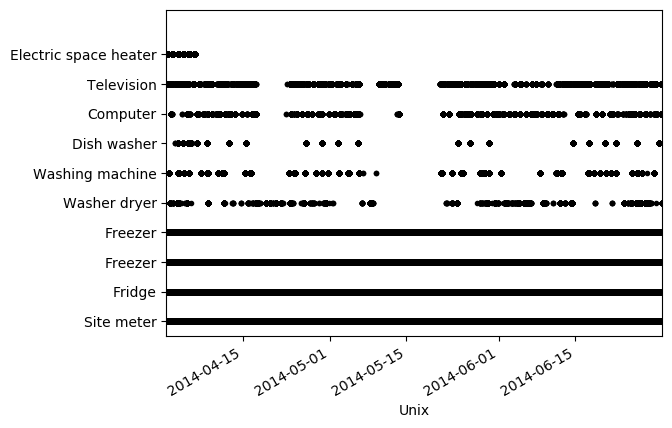

In [16]:
refit.buildings[1].elec.plot_when_on(on_power_threshold = 40)

In [17]:
fridge = next(refit.buildings[1].elec['fridge'].load(sample_period=30))
aggregate = next(refit.buildings[1].elec.mains().load(sample_period=30))

In [18]:
aggregate.head(), aggregate.shape

(physical_quantity          power
 type                      active
 Unix                            
 2014-04-01 00:00:00+01:00  197.4
 2014-04-01 00:00:30+01:00  198.6
 2014-04-01 00:01:00+01:00  198.0
 2014-04-01 00:01:30+01:00  198.0
 2014-04-01 00:02:00+01:00  196.0,
 (262080, 1))

In [19]:
fridge.head(), fridge.shape

(physical_quantity          power
 type                      active
 Unix                            
 2014-04-01 00:00:00+01:00   68.4
 2014-04-01 00:00:30+01:00   68.4
 2014-04-01 00:01:00+01:00   68.0
 2014-04-01 00:01:30+01:00   68.0
 2014-04-01 00:02:00+01:00   68.2,
 (262080, 1))

In [20]:
aggregate

physical_quantity,power
type,active
Unix,
2014-04-01 00:00:00+01:00,197.400000
2014-04-01 00:00:30+01:00,198.600000
2014-04-01 00:01:00+01:00,198.000000
2014-04-01 00:01:30+01:00,198.000000
2014-04-01 00:02:00+01:00,196.000000
...,...
2014-06-30 23:57:30+01:00,152.750000
2014-06-30 23:58:00+01:00,153.000000


In [21]:
aggregate = aggregate['power']['active']
aggregate.head(n=5)

Unix
2014-04-01 00:00:00+01:00    197.4
2014-04-01 00:00:30+01:00    198.6
2014-04-01 00:01:00+01:00    198.0
2014-04-01 00:01:30+01:00    198.0
2014-04-01 00:02:00+01:00    196.0
Freq: 30S, Name: active, dtype: float64

In [22]:
type(aggregate)

pandas.core.series.Series

In [23]:
def normalise(df):
    """
    Normalises the values in df
    """
    mean = df.fillna(method='ffill').values.mean()
    std = df.fillna(method = 'ffill').values.std()
    return mean, std, (df.fillna(method='ffill').values-mean)/std
mean_agg, std_agg, aggregate = normalise(aggregate)
mean_frz, std_frz, fridge = normalise(fridge)

In [24]:
mean_agg

356.7326074416105

In [25]:
fridge = fridge.reshape(-1)

In [26]:
WINDOW_SIZE =99
aggregate = np.pad(aggregate, (WINDOW_SIZE//2, WINDOW_SIZE//2 +1))
fridge = np.pad(fridge.reshape(-1), (WINDOW_SIZE//2, WINDOW_SIZE//2 +1))

In [27]:
fridge.shape

(262179,)

In [28]:
aggregate = np.array([
aggregate[i:i+WINDOW_SIZE] for i in range(len(aggregate)-WINDOW_SIZE)
])
aggregate.shape

(262080, 99)

In [29]:
fridge = np.array([
fridge[i:i+WINDOW_SIZE] for i in range(len(fridge)-WINDOW_SIZE)
])
fridge.shape

(262080, 99)

In [30]:
#################################
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.dates import DateFormatter
import matplotlib.font_manager
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
plt.rc('text', usetex=False)
plt.rc('xtick', labelsize=24)
plt.rc('ytick', labelsize=24)
plt.rc('axes', labelsize=26)

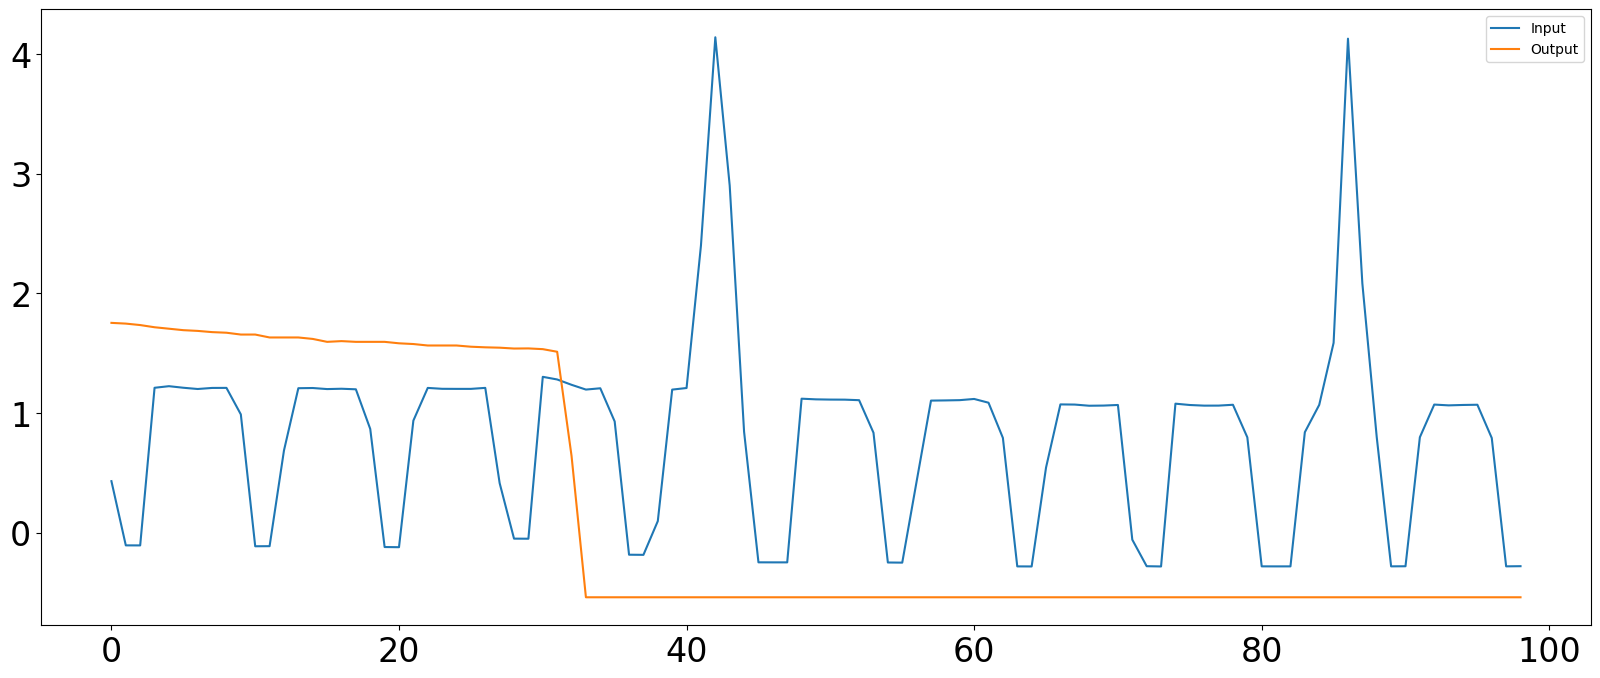

In [31]:
index = 300
input_seq = aggregate[index]

output_seq = fridge[index]
figure(figsize=(20,8))
plt.plot(input_seq, label='Input')
plt.plot(output_seq, label='Output')
plt.legend()
plt.show()

In [32]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv1D, Dropout, Flatten, Dense
def return_seq2seq(sequence_length):
    model = Sequential()
    # 1D Conv
    model.add(Conv1D(30,10,activation="relu",input_shape=(sequence_length,1),strides=2))
    model.add(Conv1D(30, 8, activation='relu', strides=2))
    model.add(Conv1D(40, 6, activation='relu', strides=1))
    model.add(Conv1D(50, 5, activation='relu', strides=1))
    model.add(Dropout(.2))
    model.add(Conv1D(50, 5, activation='relu', strides=1))
    model.add(Dropout(.2))
    model.add(Flatten())
    model.add(Dense(1024, activation='relu'))
    model.add(Dropout(.2))
    model.add(Dense(sequence_length))
    optim = tf.keras.optimizers.Adam(learning_rate=1e-4)
    model.compile(loss='mse', optimizer=optim)
    return model

fridge_model = return_seq2seq(WINDOW_SIZE)

In [33]:
fridge_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 45, 30)            330       
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 19, 30)            7230      
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 14, 40)            7240      
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 10, 50)            10050     
_________________________________________________________________
dropout (Dropout)            (None, 10, 50)            0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 6, 50)             12550     
_________________________________________________________________
dropout_1 (Dropout)          (None, 6, 50)             0

In [34]:
aggregate = np.expand_dims(aggregate, axis=-1)

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(aggregate, fridge,test_size=.2, shuffle=False)
X_train.shape, X_test.shape, y_train.shape, y_test.shape,X_train.shape, y_train.shape

((209664, 99, 1),
 (52416, 99, 1),
 (209664, 99),
 (52416, 99),
 (209664, 99, 1),
 (209664, 99))

In [36]:
np.isnan(X_train).sum(), np.isnan(y_train).sum()

(0, 0)

In [ ]:
history = fridge_model.fit(X_train, y_train, validation_split=.15,batch_size=64,
epochs=100, shuffle=True)

Epoch 1/100
2785/2785 [==============================] - 26s 9ms/step - loss: 0.8337 - val_loss: 0.6650
Epoch 2/100
2785/2785 [==============================] - 24s 9ms/step - loss: 0.6894 - val_loss: 0.6360
Epoch 3/100
2785/2785 [==============================] - 24s 9ms/step - loss: 0.6436 - val_loss: 0.6192
Epoch 4/100
2111/2785 [=====================>........] - ETA: 5s - loss: 0.6155